NoiseType1 Spectogram initially

Processing: NoiseType1.wav


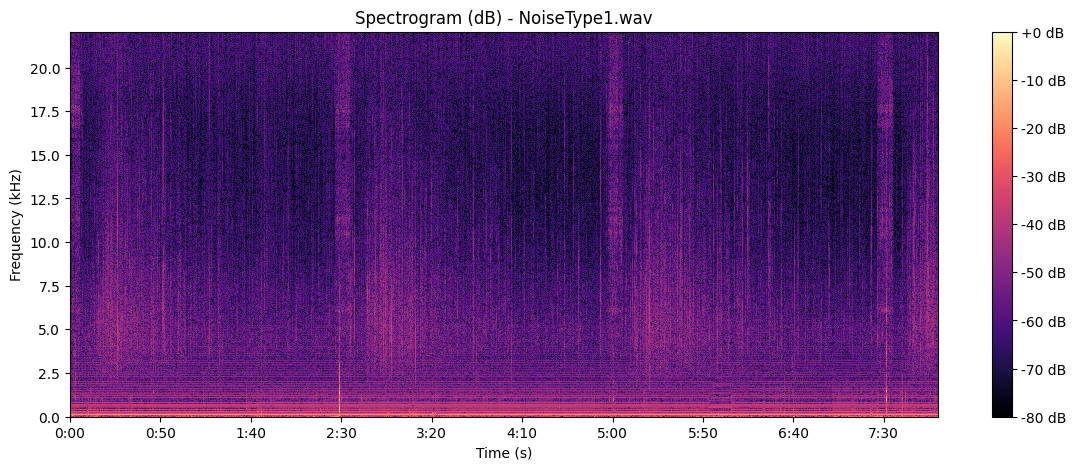

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def plot_spectrogram(audio_path):
    """
    Plot the spectrogram of an audio file without log scale and with frequency in kHz.
    """
    print(f"Processing: {audio_path}")
    
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Compute the Short-Time Fourier Transform (STFT) and convert to dB
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')  # Use linear scale
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram (dB) - {audio_path}')
    
    # Customize y-axis to display in kHz
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.1f}'))
    plt.ylabel('Frequency (kHz)')
    plt.xlabel('Time (s)')
    plt.show()

# Example usage
if __name__ == "__main__":
    audio_file = "NoiseType1.wav"  # Replace with the actual file path
    plot_spectrogram(audio_file)

Static noise removal (Spectral Subtraction, Wavelet denoising)

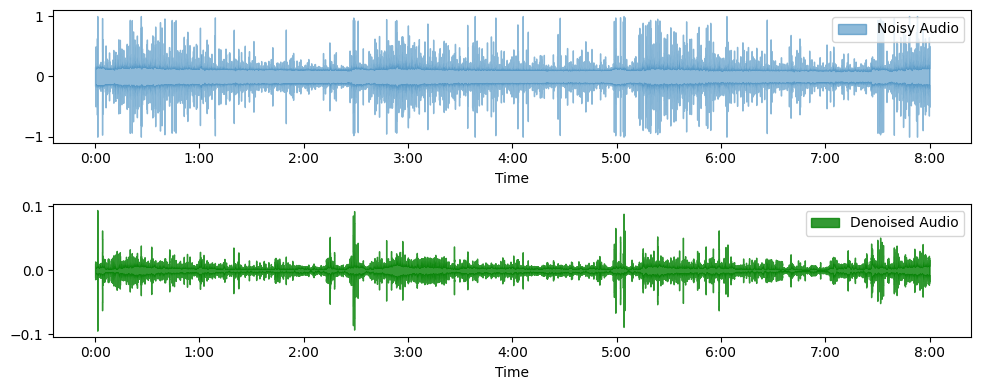

Denoised audio saved as: modified_audio.wav


In [1]:
import numpy as np
import librosa
import librosa.display
import scipy.signal as signal
import pywt
import soundfile as sf
import matplotlib.pyplot as plt

# Load the noisy audio file
audio_path = "NoiseType1.wav"  # Change to your file path
y, sr = librosa.load(audio_path, sr=None)

# Step 1: Estimate Noise Profile (Using Initial Silence)
def estimate_noise(y, noise_duration=0.5, sr=22050):
    noise_samples = int(noise_duration * sr)
    noise_profile = y[:noise_samples]
    return np.mean(np.abs(librosa.stft(noise_profile)), axis=1)

# Step 2: Spectral Subtraction
def spectral_subtraction(y, sr):
    noise_profile = estimate_noise(y, sr=sr)
    S = np.abs(librosa.stft(y))
    S_denoised = np.maximum(S - noise_profile[:, np.newaxis], 0)  # Subtract noise
    return librosa.istft(S_denoised)

# Step 3: Wavelet Denoising
def wavelet_denoise(y, wavelet="db4", level=4):
    coeffs = pywt.wavedec(y, wavelet, level=level)
    threshold = np.median(np.abs(coeffs[-1])) / 0.6745
    coeffs_thresholded = [pywt.threshold(c, threshold, mode="soft") for c in coeffs]
    return pywt.waverec(coeffs_thresholded, wavelet)

# Apply noise reduction techniques
y_spectral = spectral_subtraction(y, sr)
y_denoised = wavelet_denoise(y_spectral)

# Save the cleaned audio
output_path = "modified_audio.wav"
sf.write(output_path, y_denoised, sr)

# Plot Before and After
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.5, label="Noisy Audio")
plt.legend()

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_denoised, sr=sr, alpha=0.8, color="green", label="Denoised Audio")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Denoised audio saved as: {output_path}")


Spectogram after static noise removal

Processing: modified_audio.wav


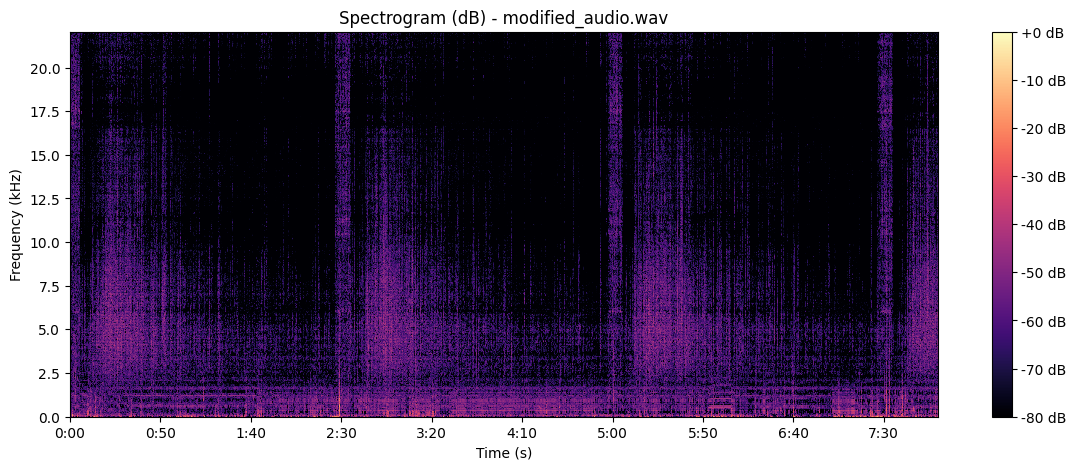

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def plot_spectrogram(audio_path):
    """
    Plot the spectrogram of an audio file without log scale and with frequency in kHz.
    """
    print(f"Processing: {audio_path}")
    
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Compute the Short-Time Fourier Transform (STFT) and convert to dB
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')  # Use linear scale
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram (dB) - {audio_path}')
    
    # Customize y-axis to display in kHz
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.1f}'))
    plt.ylabel('Frequency (kHz)')
    plt.xlabel('Time (s)')
    plt.show()

# Example usage
if __name__ == "__main__":
    audio_file = "modified_audio.wav"  # Replace with the actual file path
    plot_spectrogram(audio_file)